In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1369,2020-08-21,United Kingdom,322329.0,322280.0,41445.0,41403.0,49.0,42.0
1370,2020-08-21,Germany,229352.0,228621.0,9268.0,9253.0,731.0,15.0
1371,2020-08-21,Iran,353024.0,352558.0,20293.0,20264.0,466.0,29.0
1372,2020-08-21,Turkey,254203.0,254520.0,6056.0,6058.0,-317.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6162.385735080058
RMSE =  24236.883836816967


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.8842794759825
RMSE =  717.6950809763447


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  41131.236641221374
RMSE =  75558.13689405506
-- World performances for deaths --
MAE =  1592.2519083969466
RMSE =  1958.8068166713551


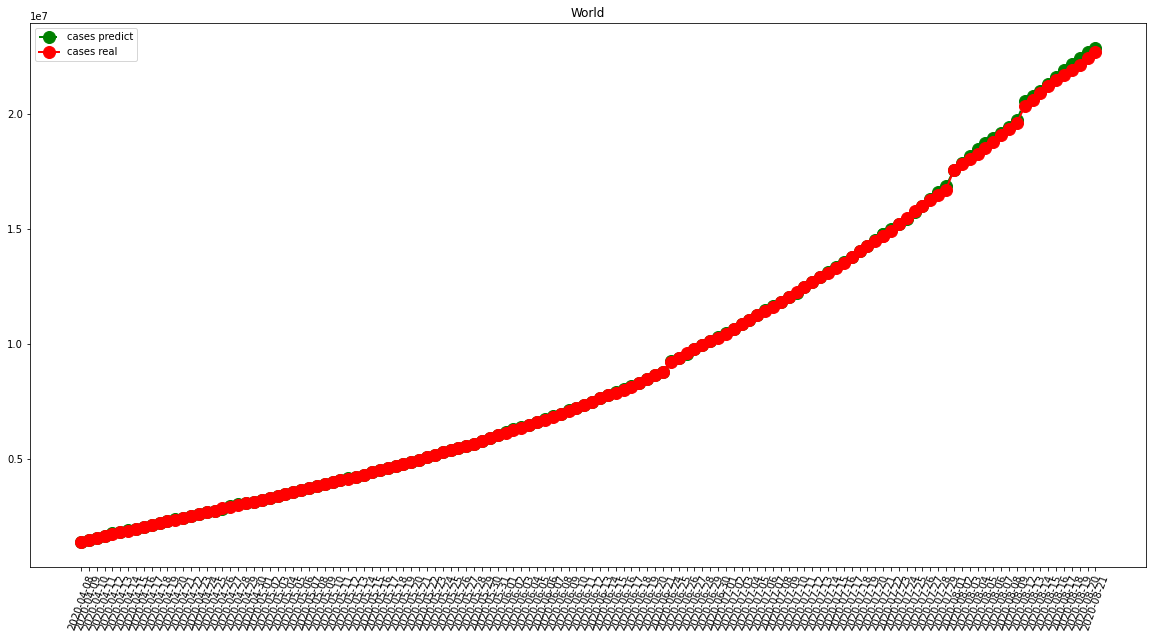

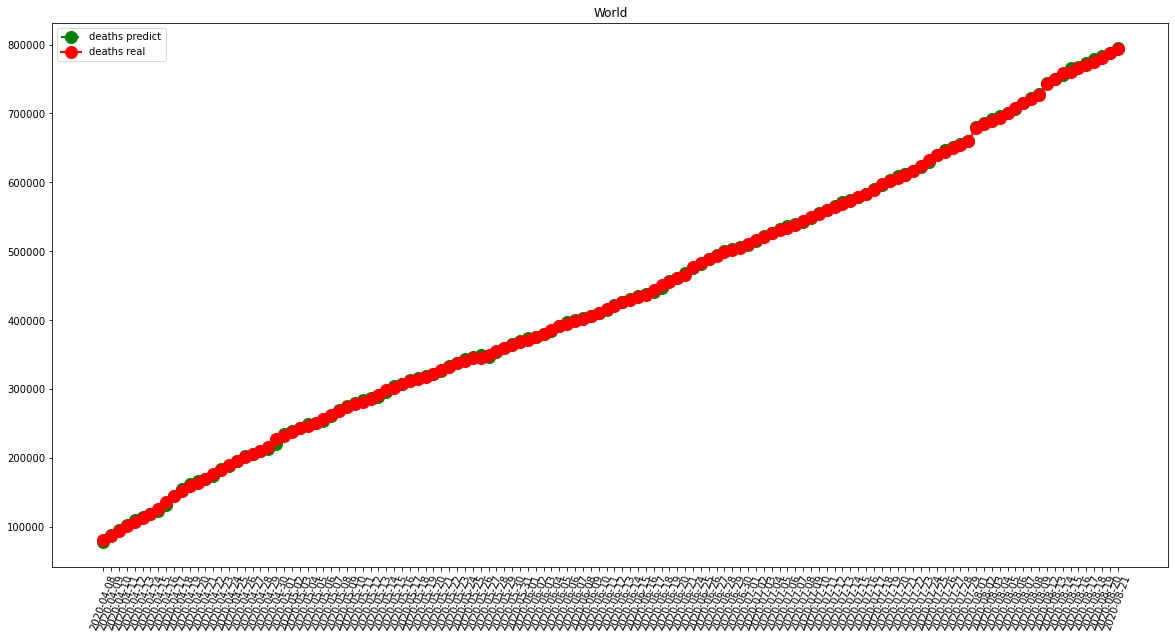

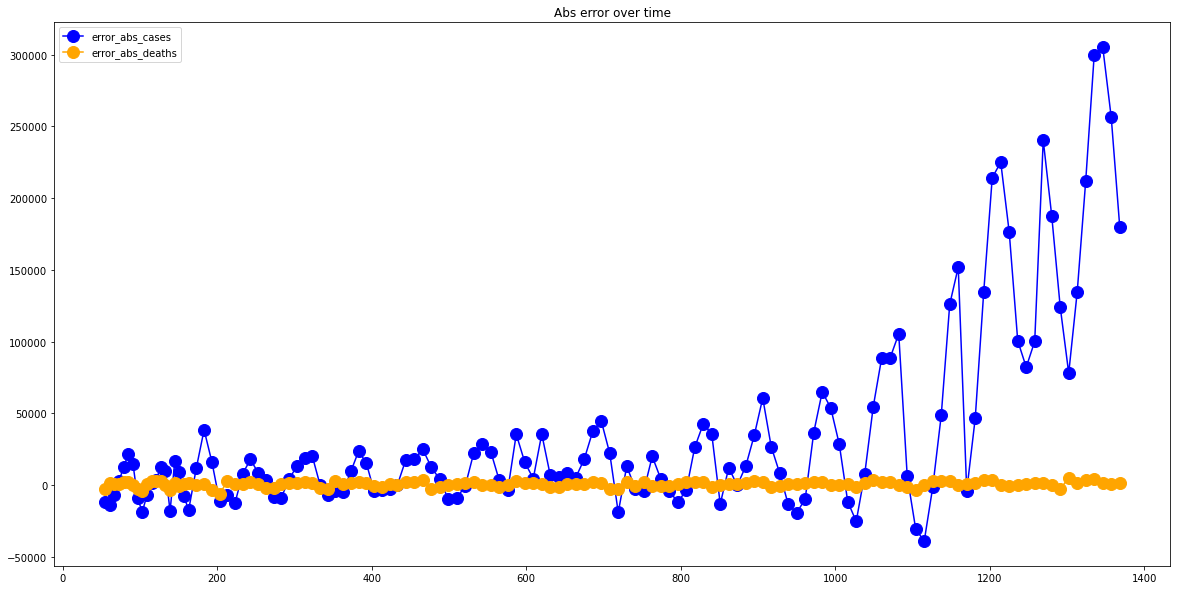

In [7]:
visShow("World")

-- France performances for cases --
MAE =  920.6382978723404
RMSE =  1405.0780953031433
-- France performances for deaths --
MAE =  130.86524822695034
RMSE =  282.3889978368328


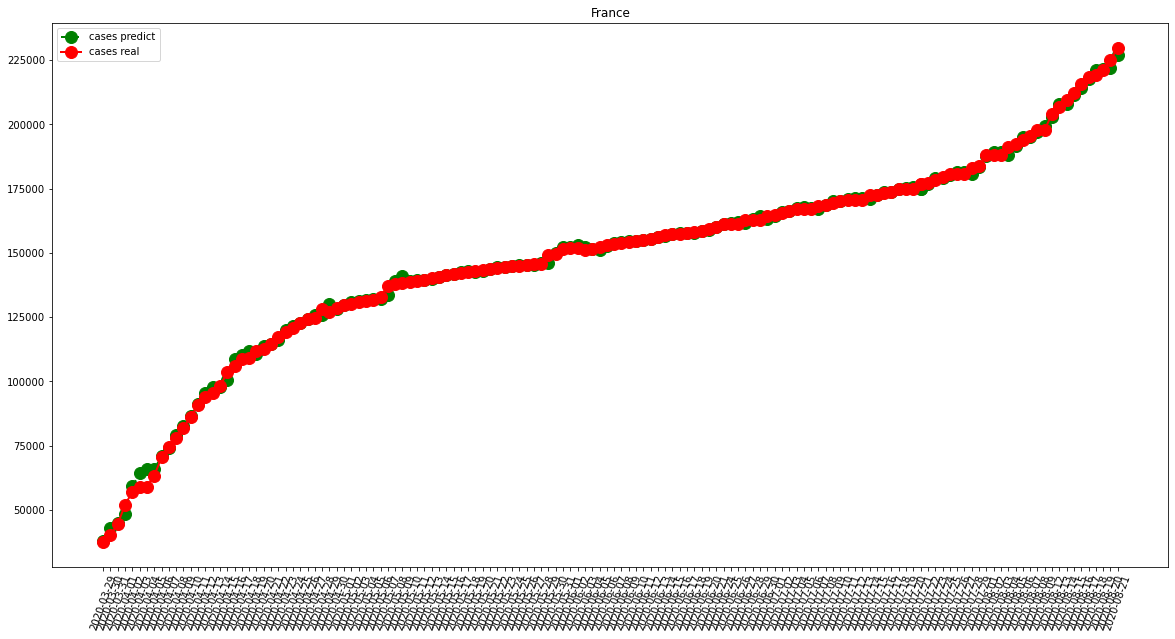

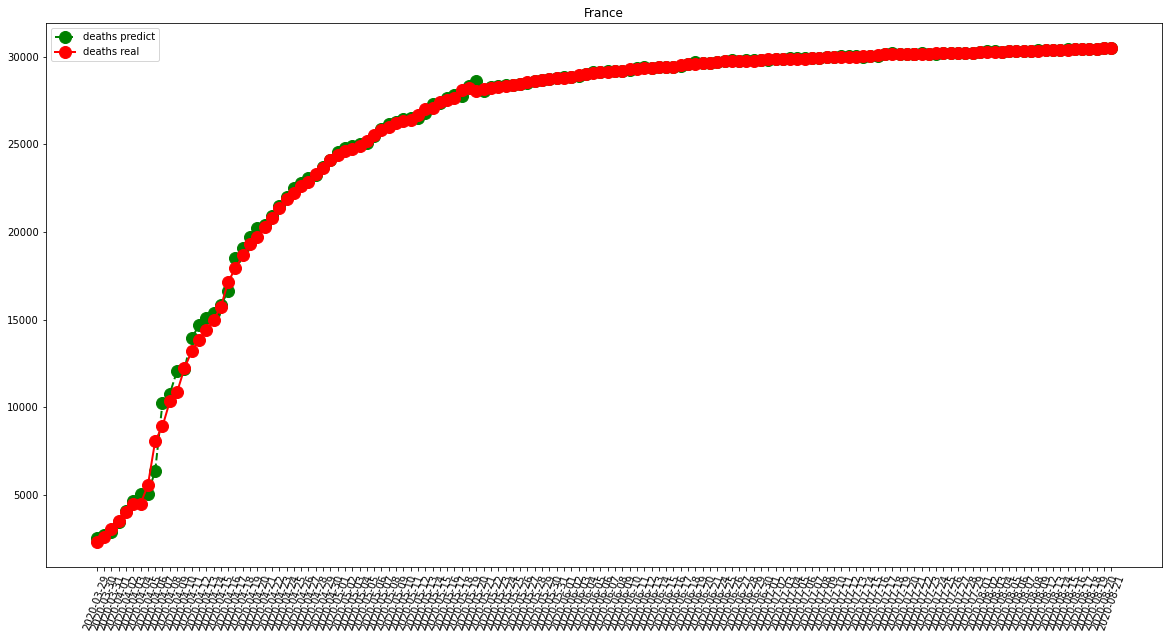

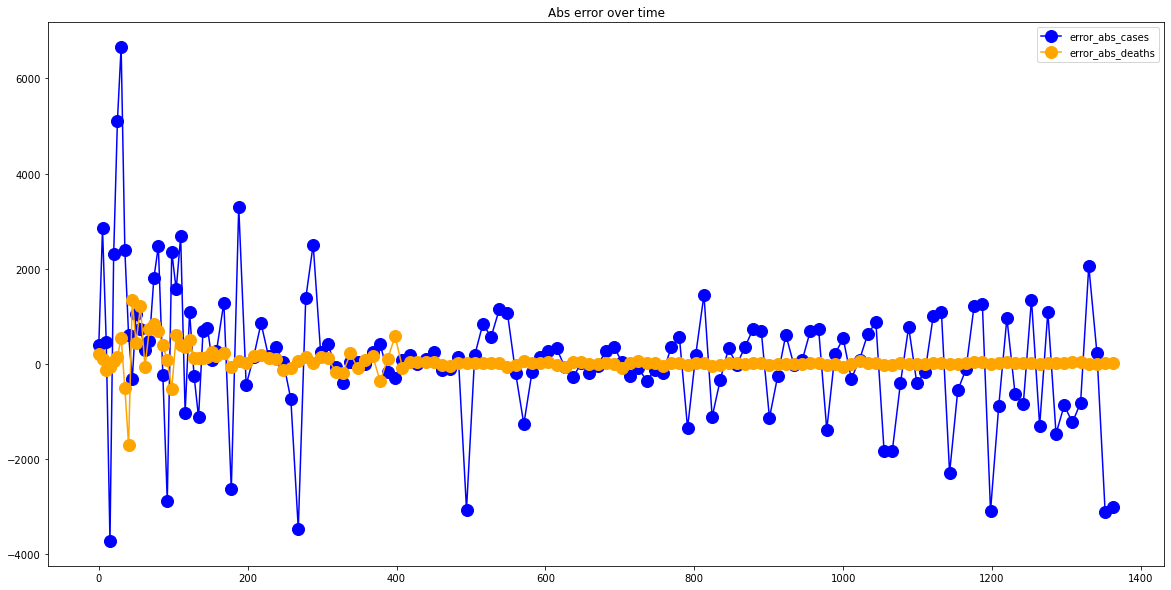

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.3829787234043
RMSE =  464.93515143024086
-- Italy performances for deaths --
MAE =  77.35460992907801
RMSE =  249.9207392085035


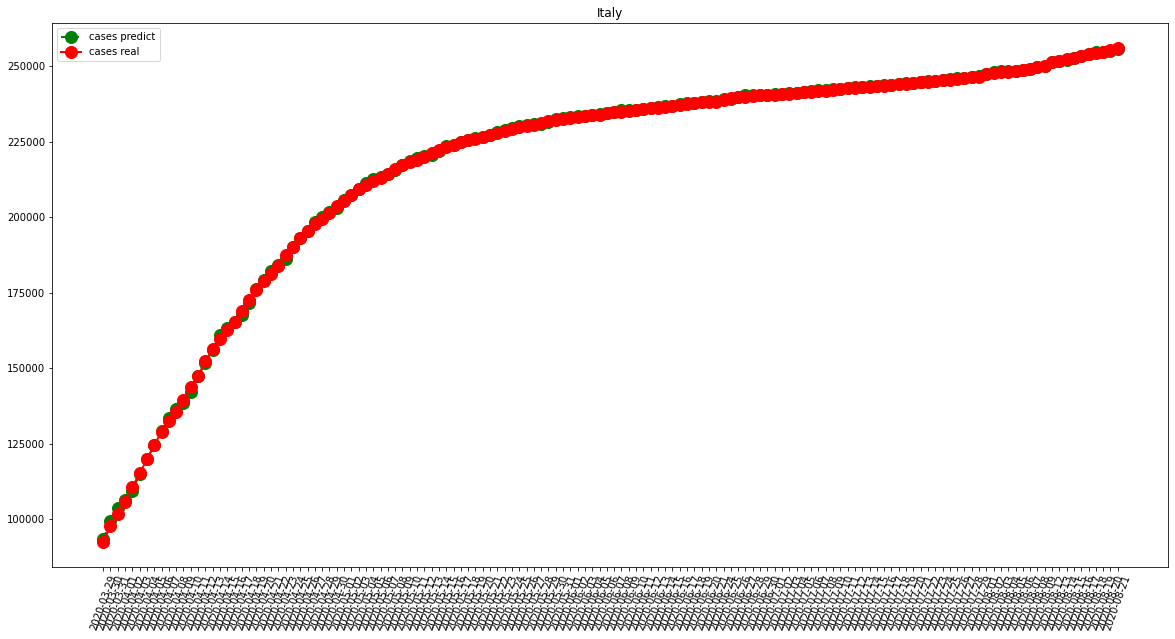

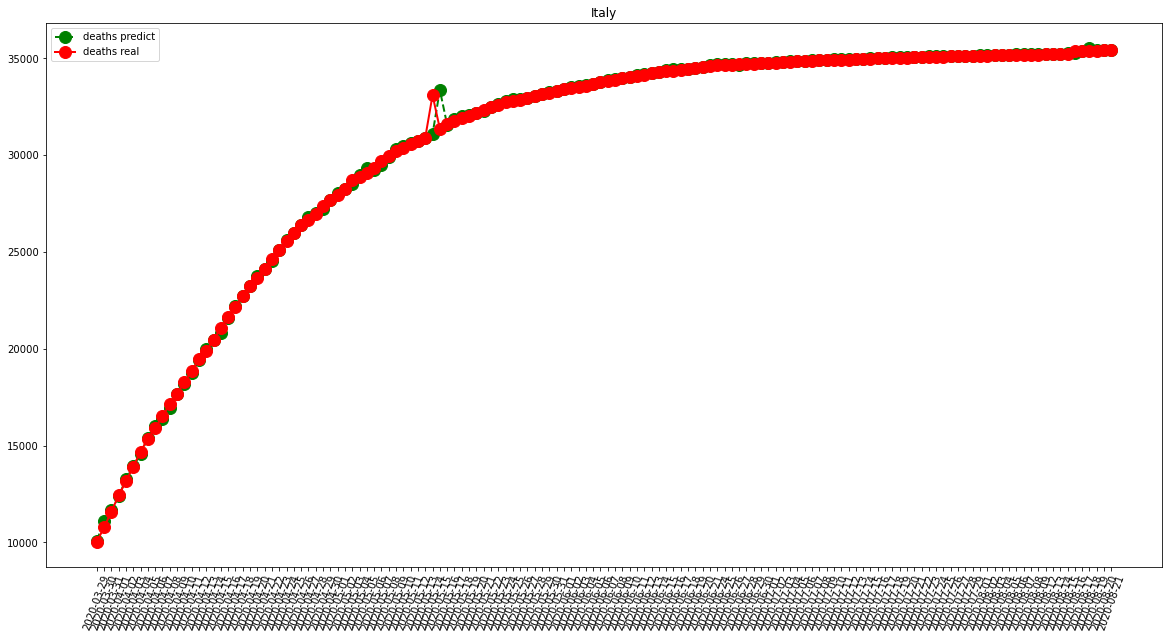

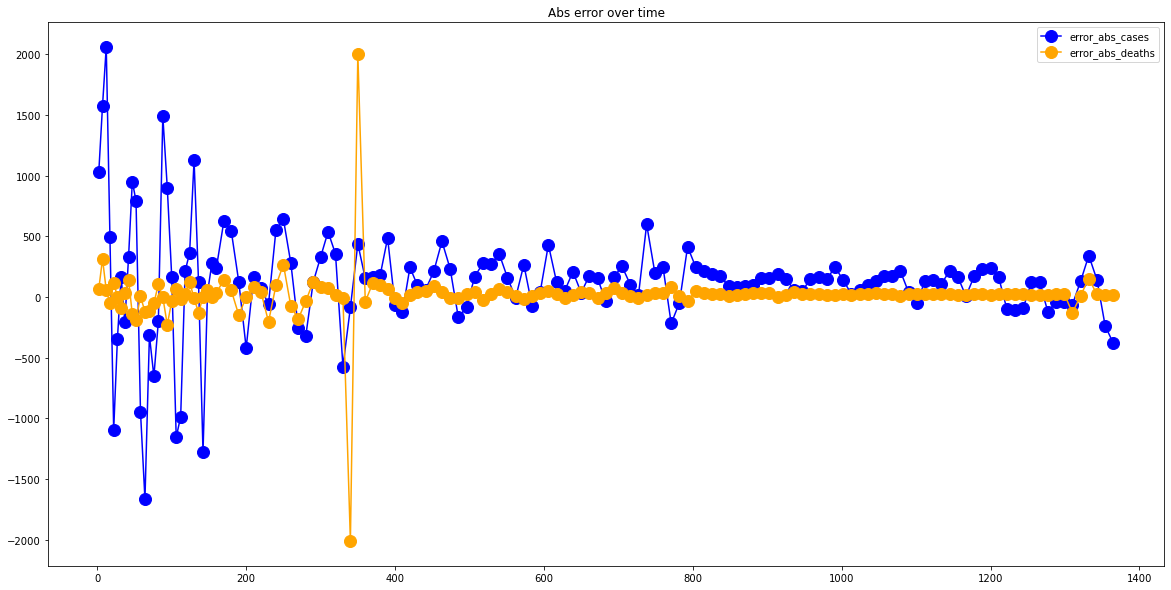

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1467.5177304964539
RMSE =  2795.5600918152977
-- Spain performances for deaths --
MAE =  133.52482269503545
RMSE =  342.0389115601858


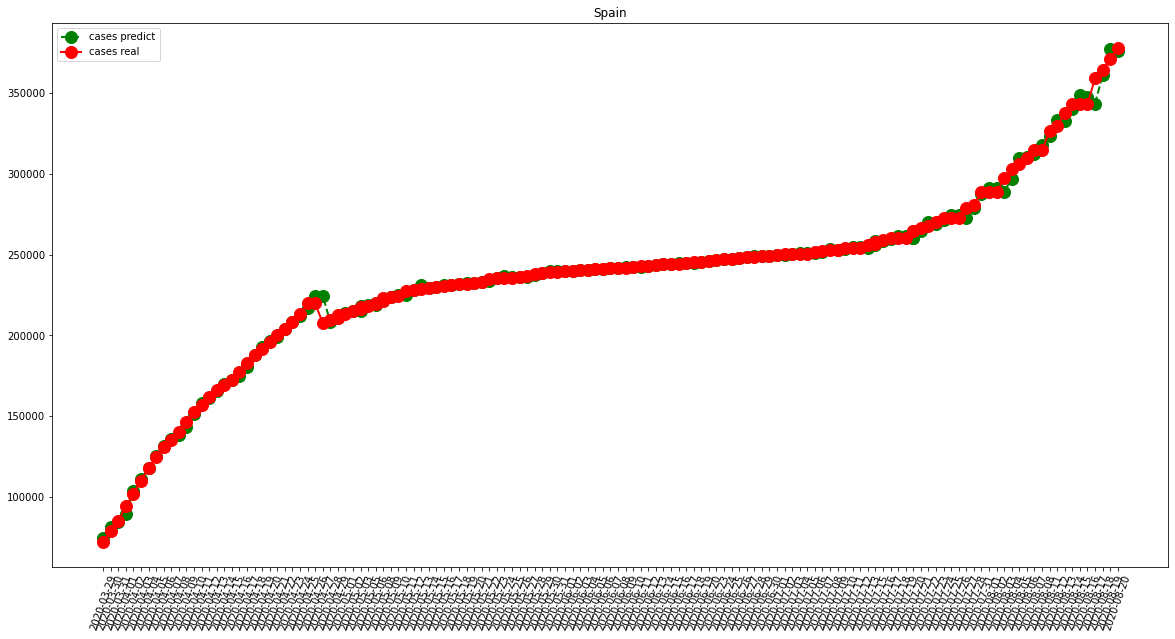

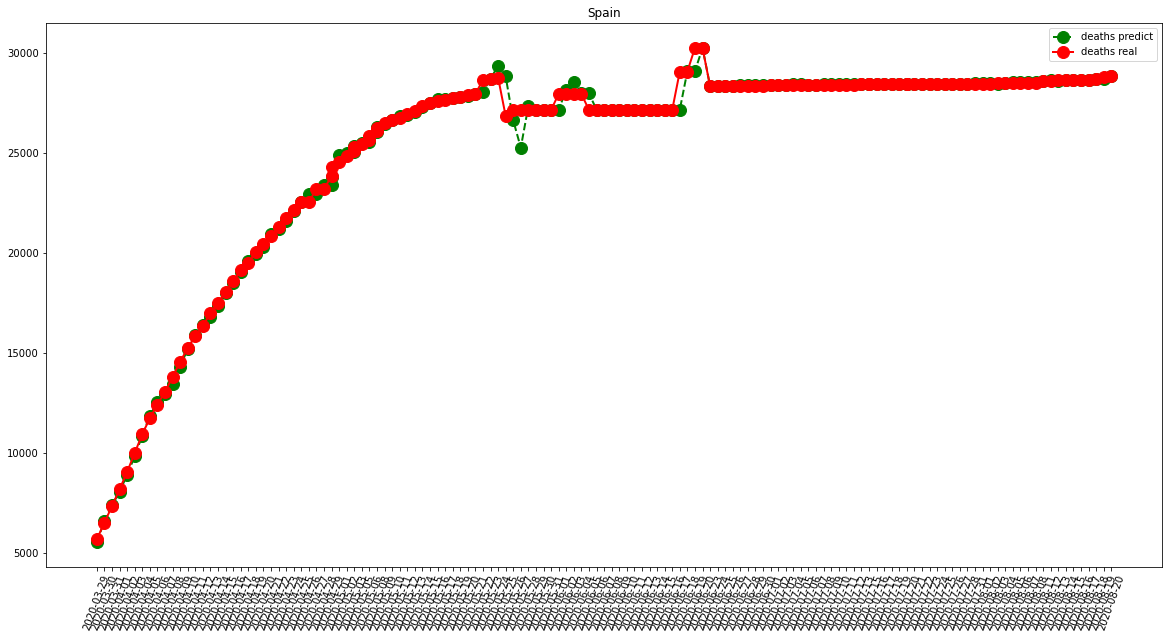

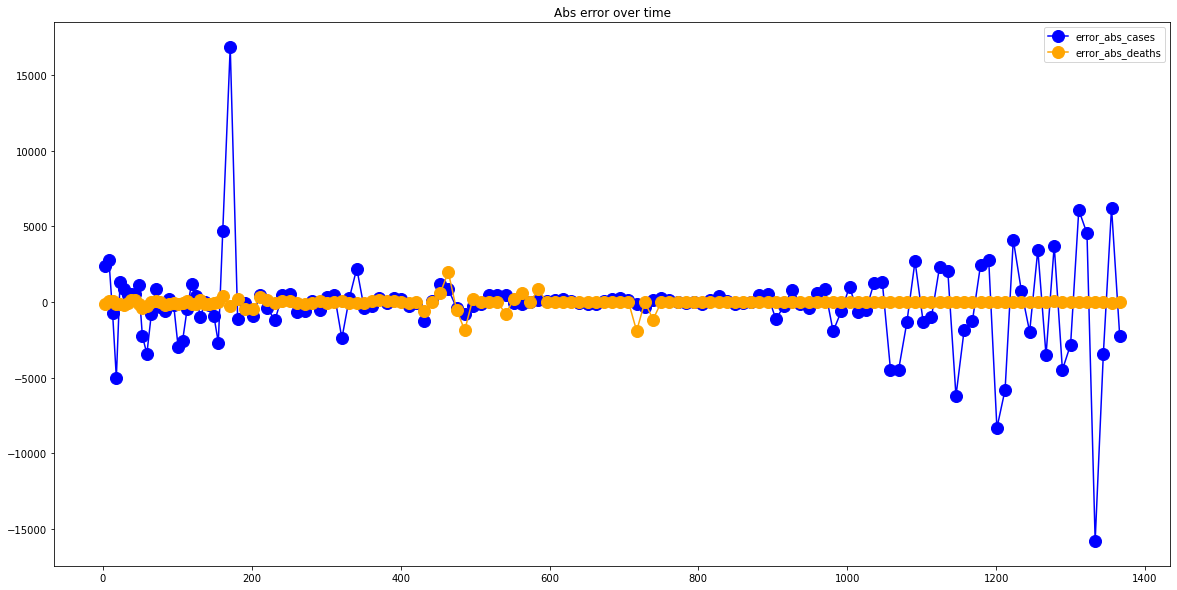

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  9504.95744680851
RMSE =  14919.081283628619
-- United States performances for deaths --
MAE =  495.07801418439715
RMSE =  705.303274641383


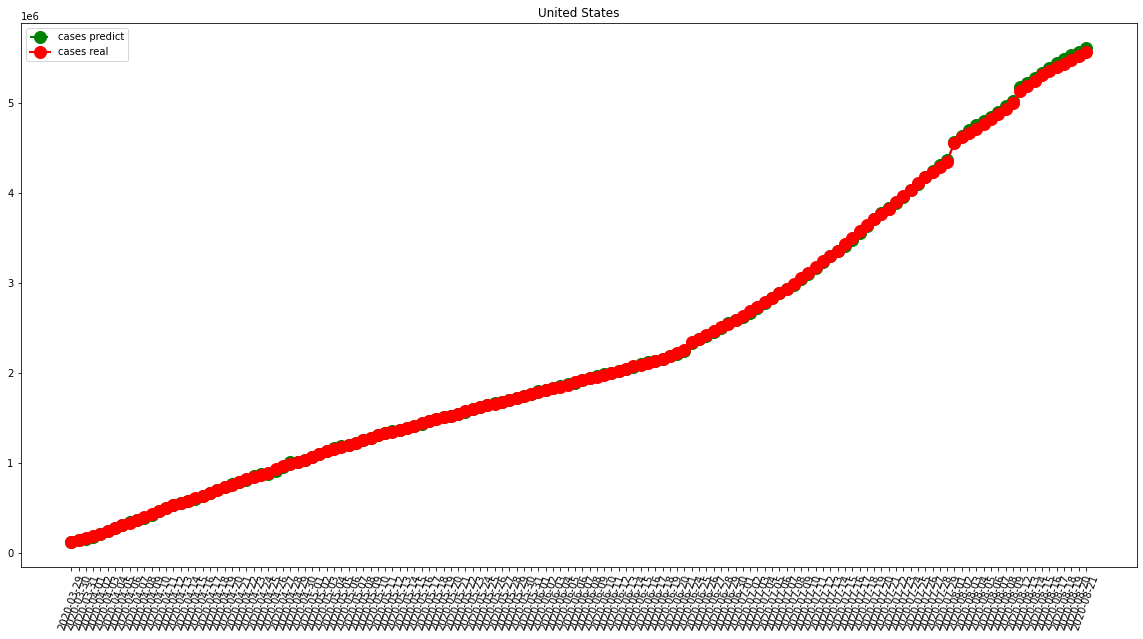

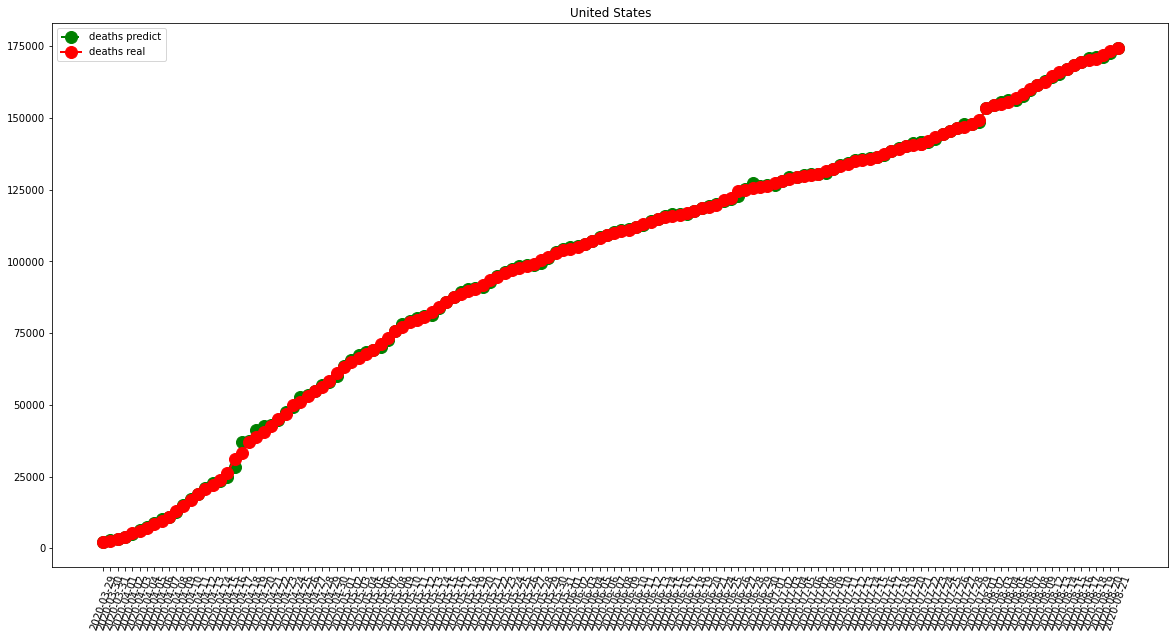

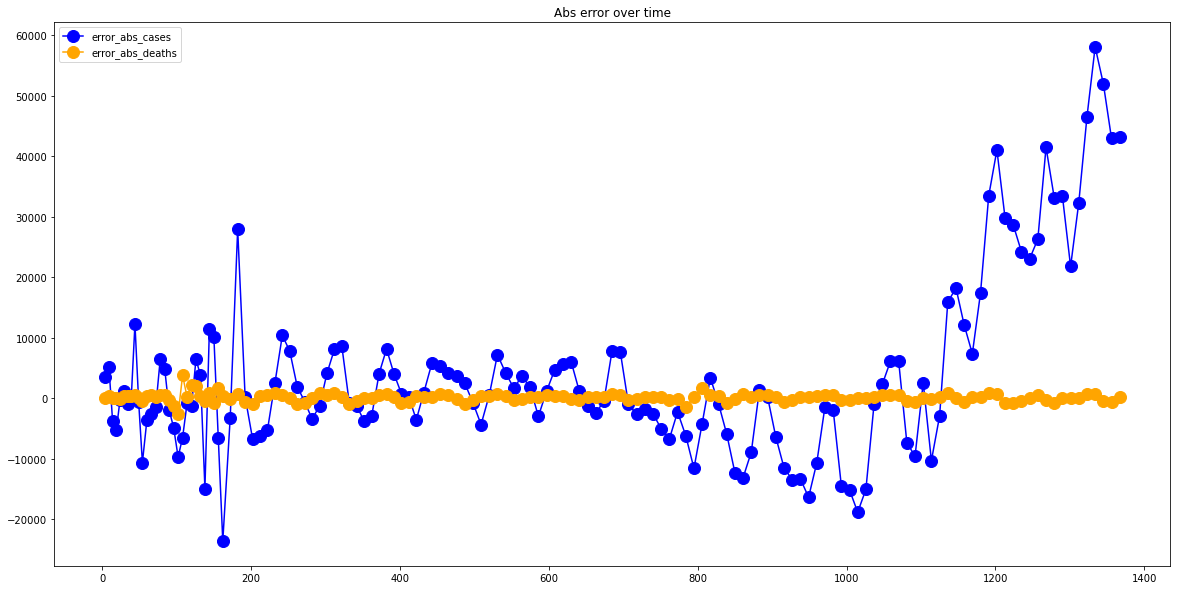

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  70.39716312056737
RMSE =  100.45478147190096
-- China performances for deaths --
MAE =  29.170212765957448
RMSE =  132.22839149641993


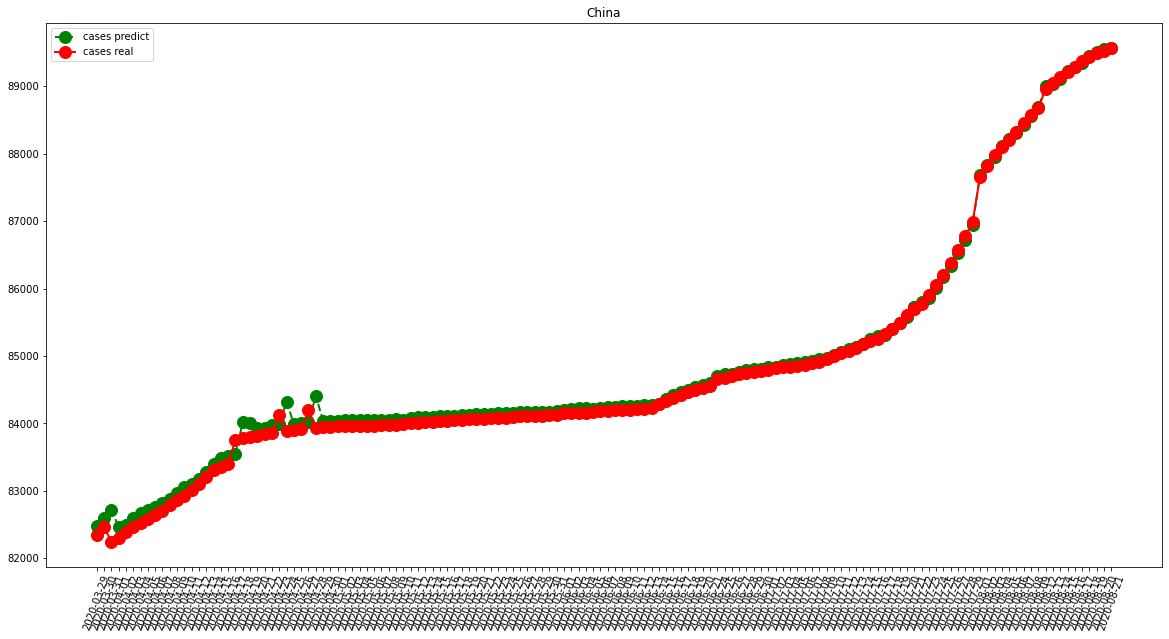

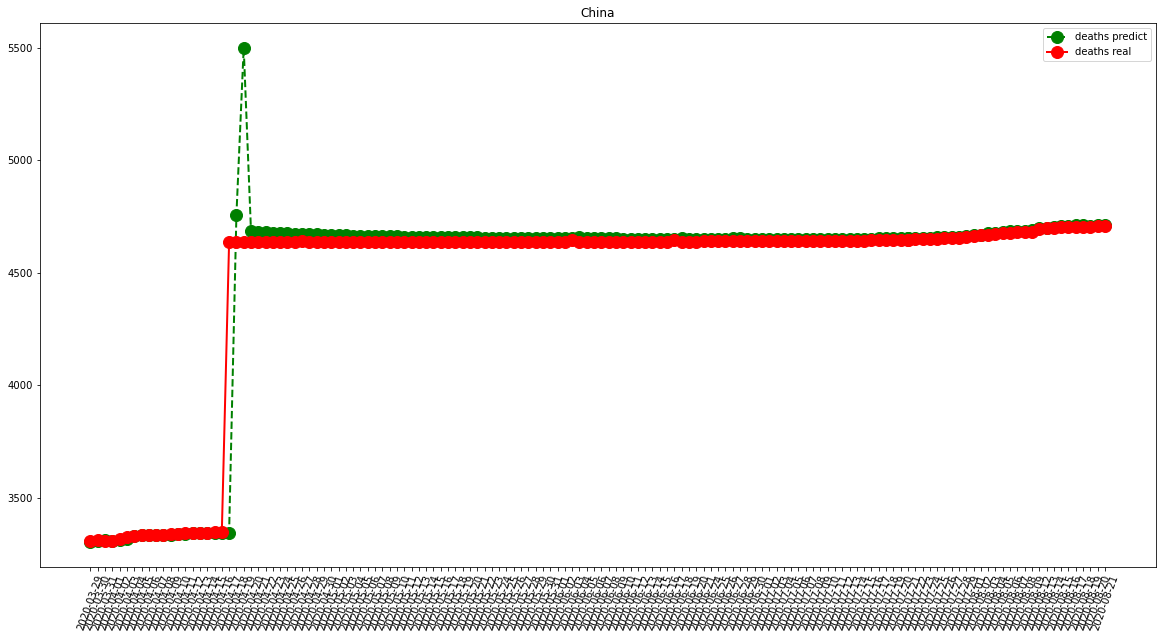

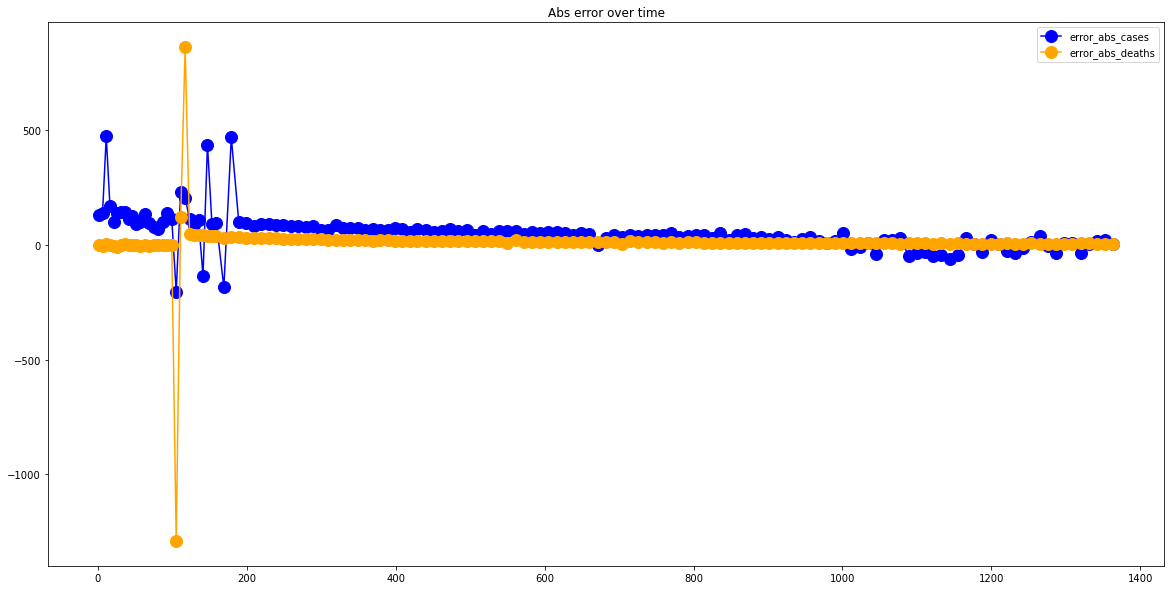

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1145.3185840707965
RMSE =  3932.806551520354
-- United Kingdom performances for deaths --
MAE =  264.05309734513276
RMSE =  802.7369553403073


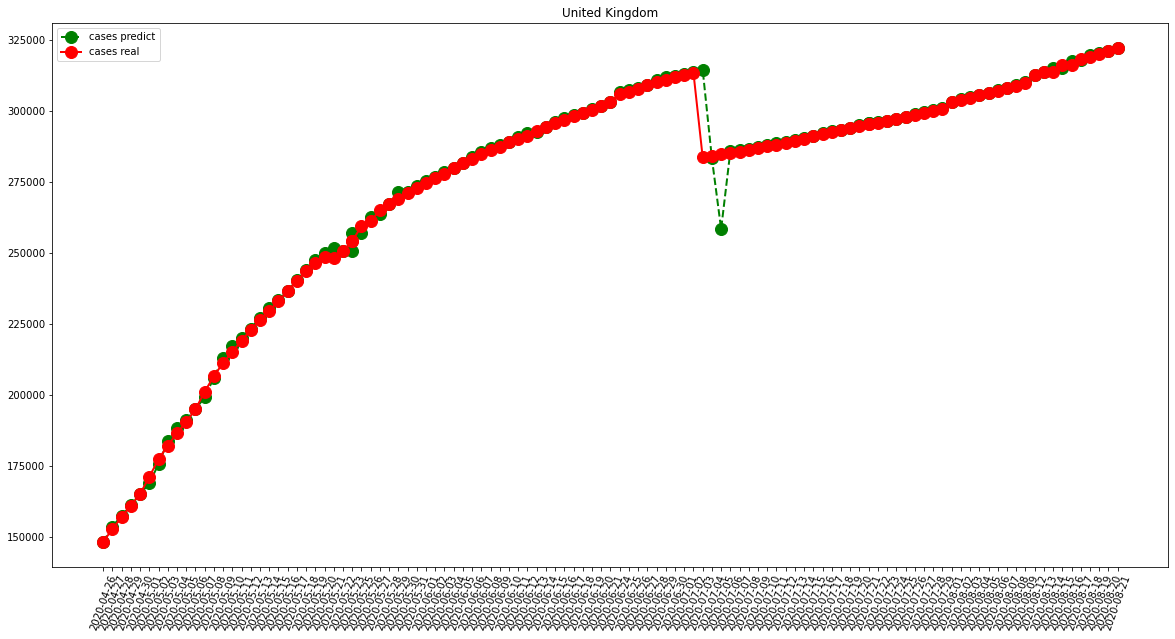

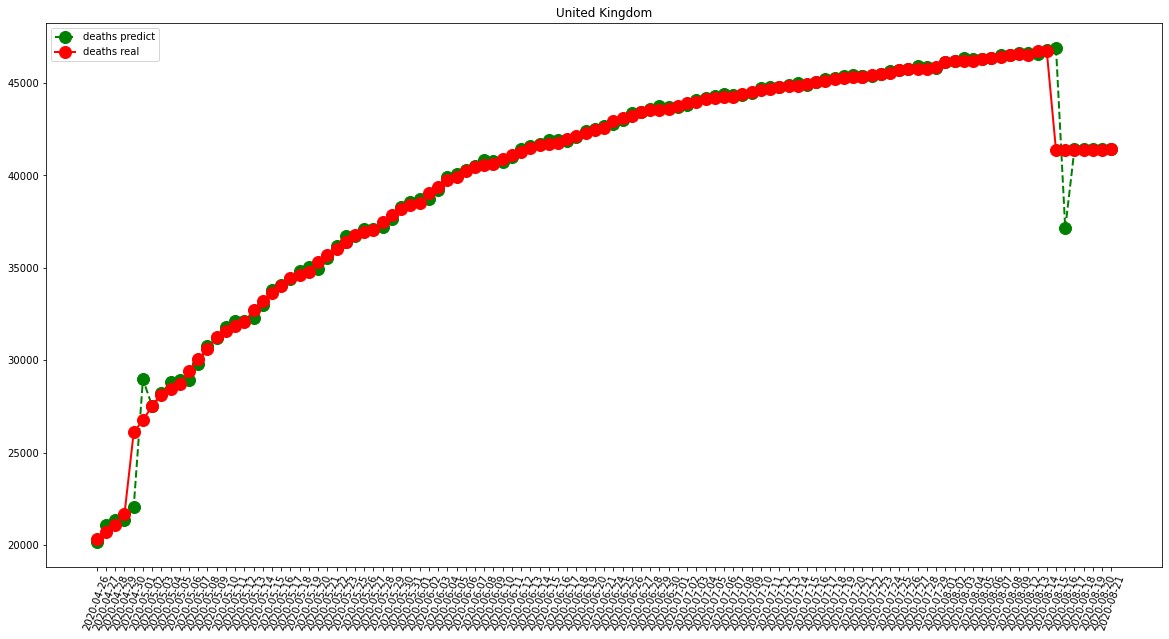

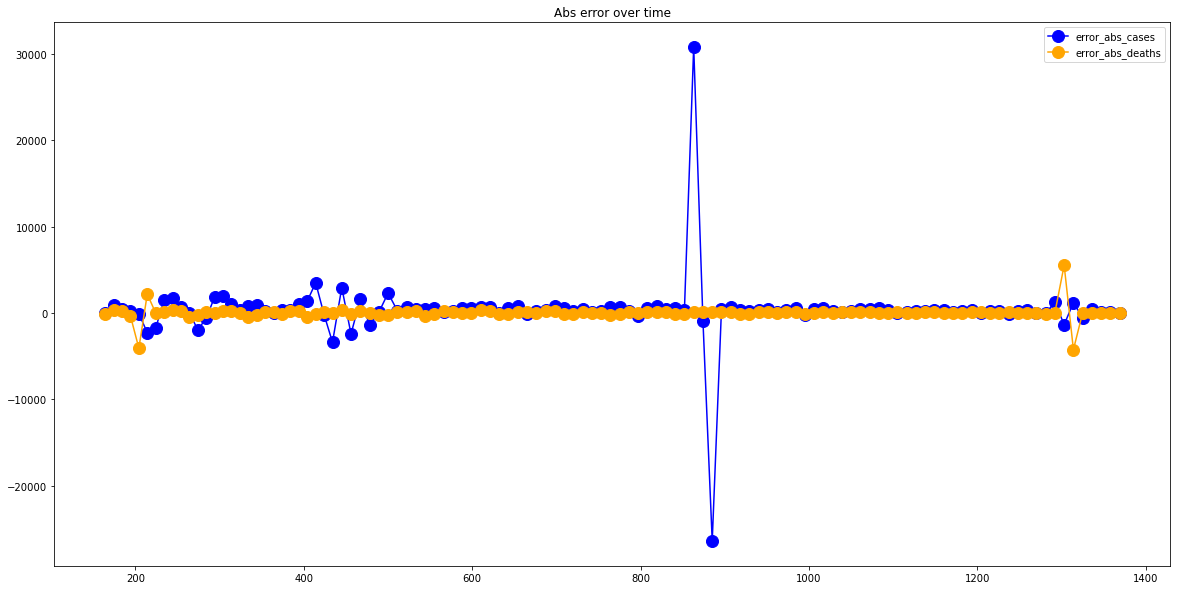

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  361.6814159292035
RMSE =  521.5842442921424
-- Germany performances for deaths --
MAE =  22.530973451327434
RMSE =  41.287894902582835


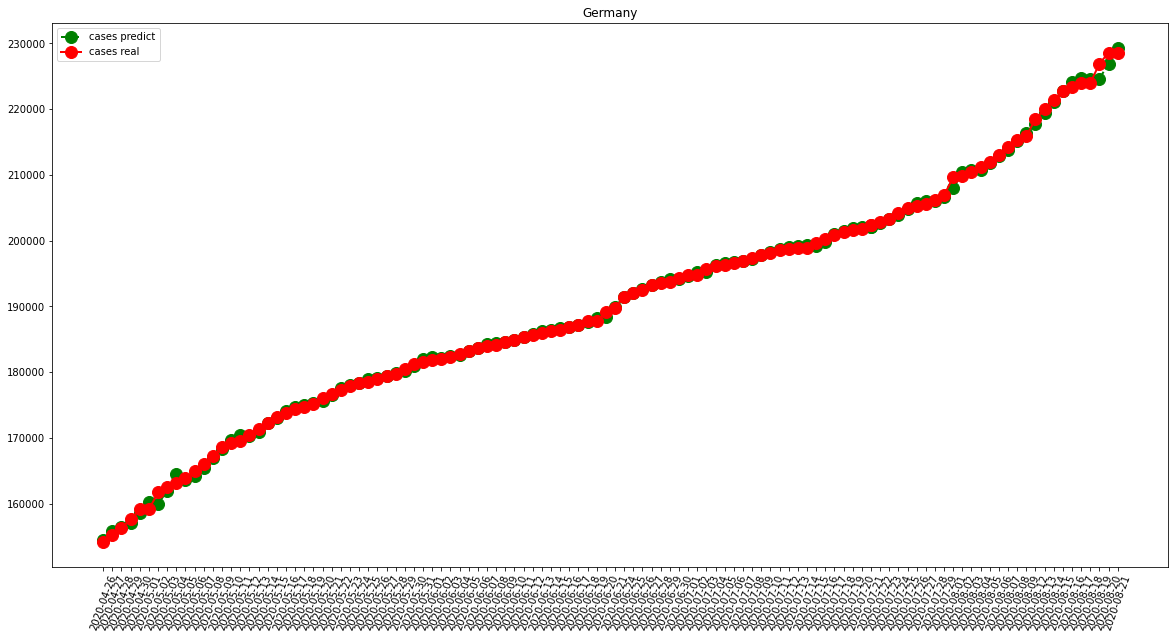

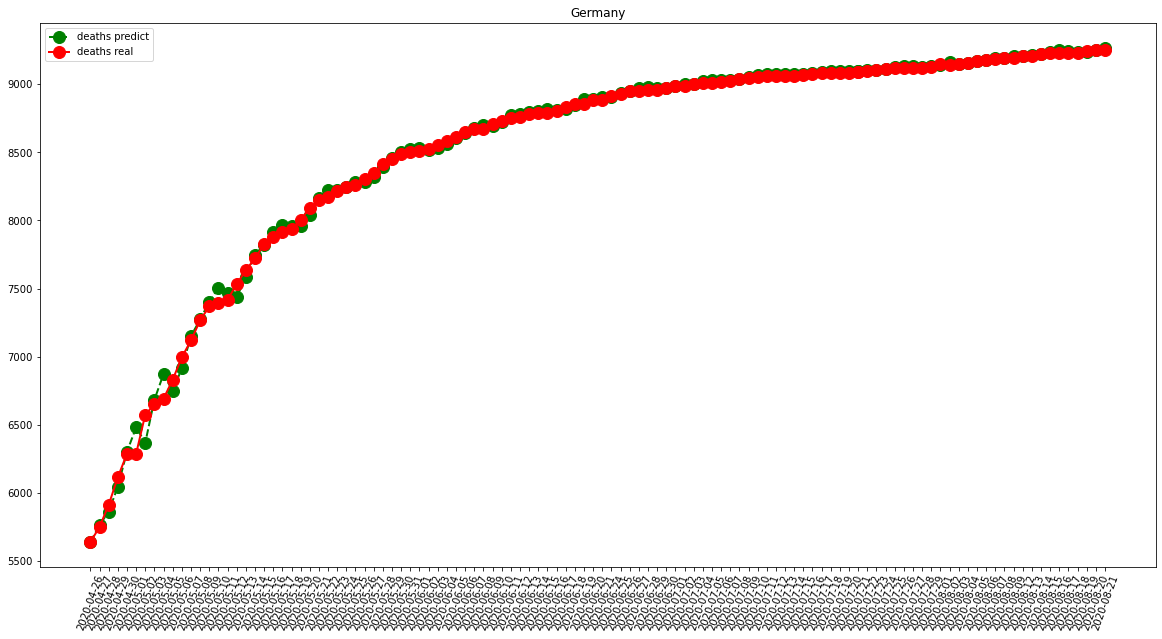

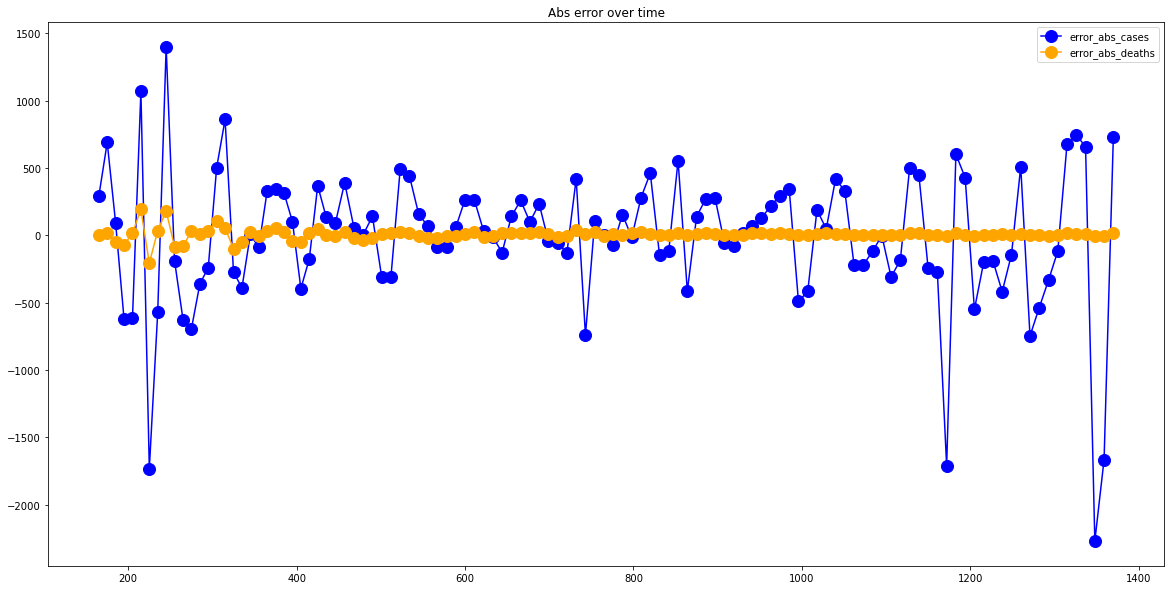

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  681.5840707964602
RMSE =  1010.8971088106692
-- Iran performances for deaths --
MAE =  36.27433628318584
RMSE =  73.50642618346703


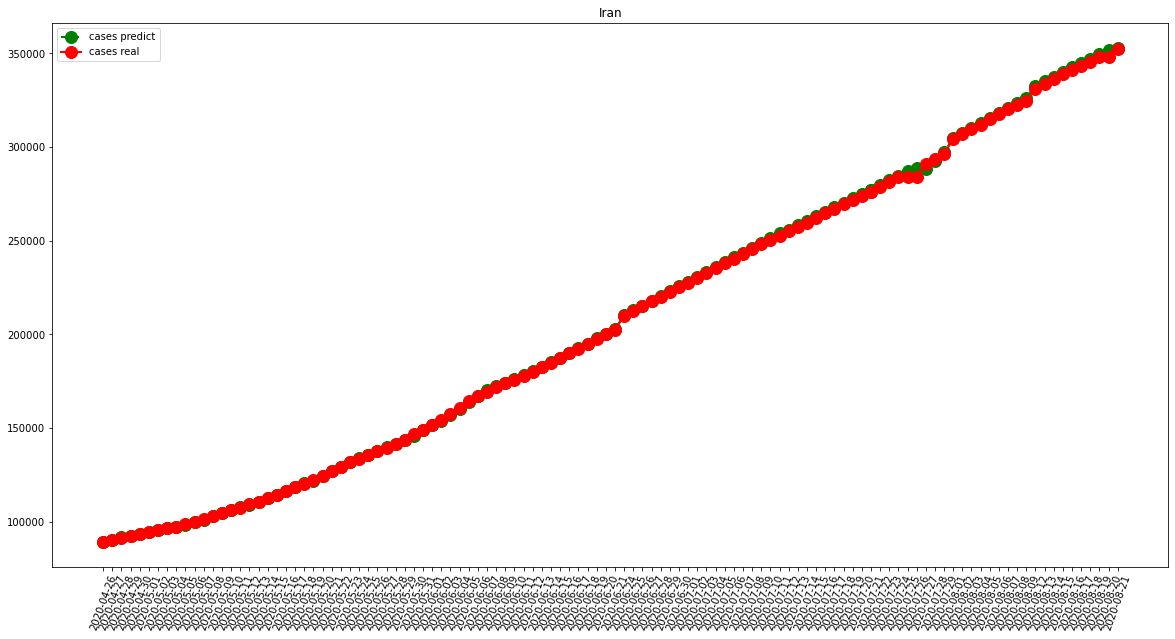

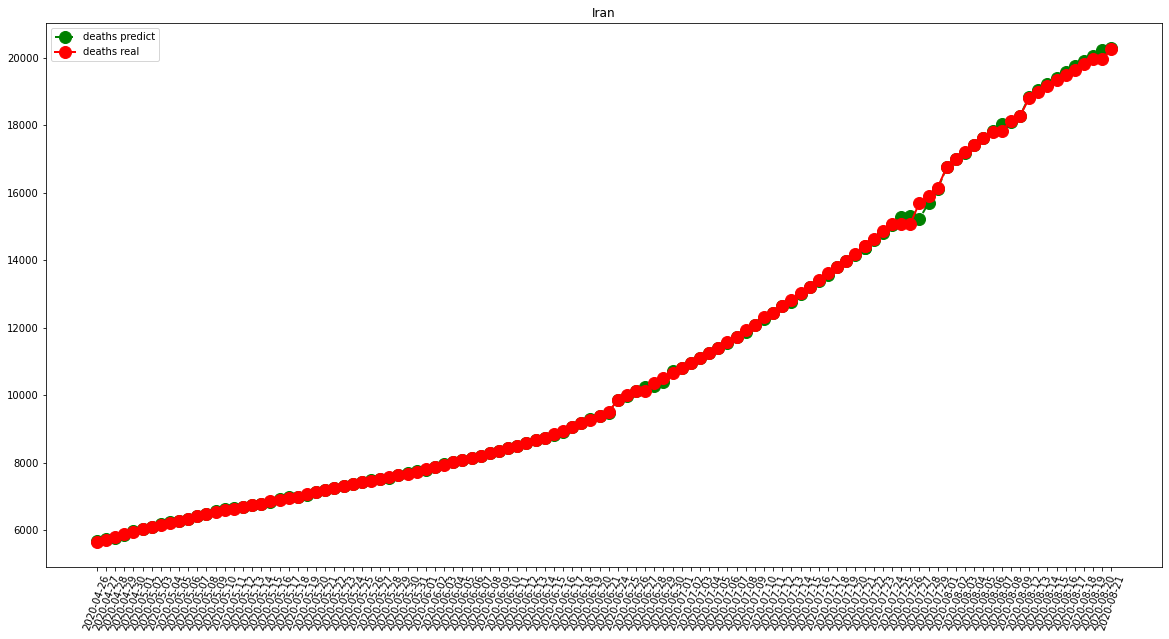

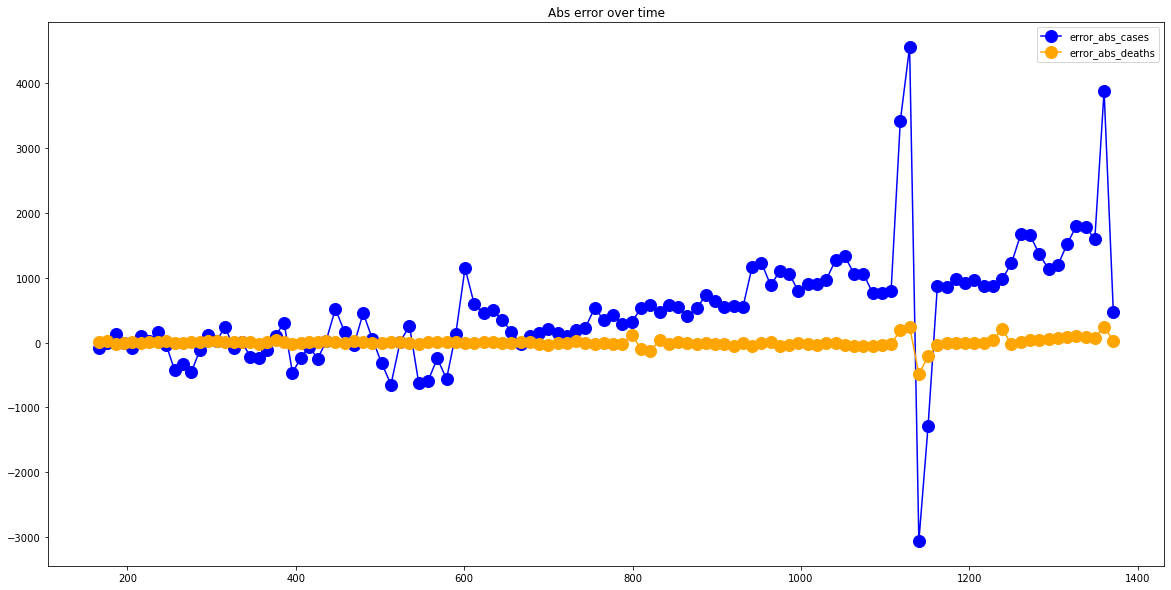

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  197.89380530973452
RMSE =  330.82222587477906
-- Turkey performances for deaths --
MAE =  17.150442477876105
RMSE =  95.50137838971898


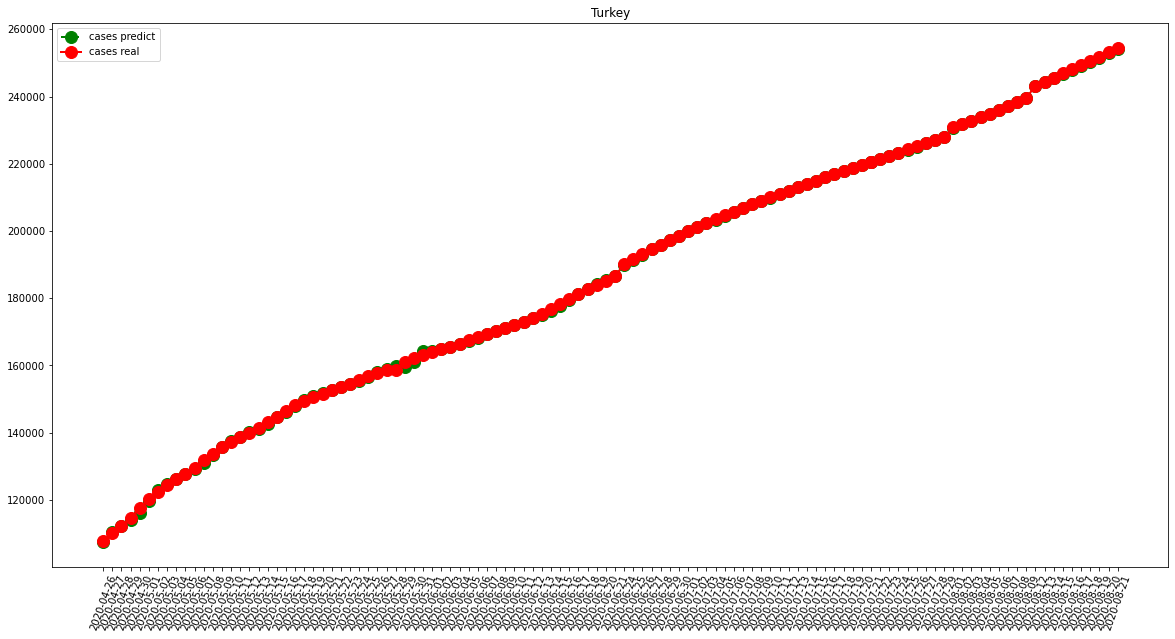

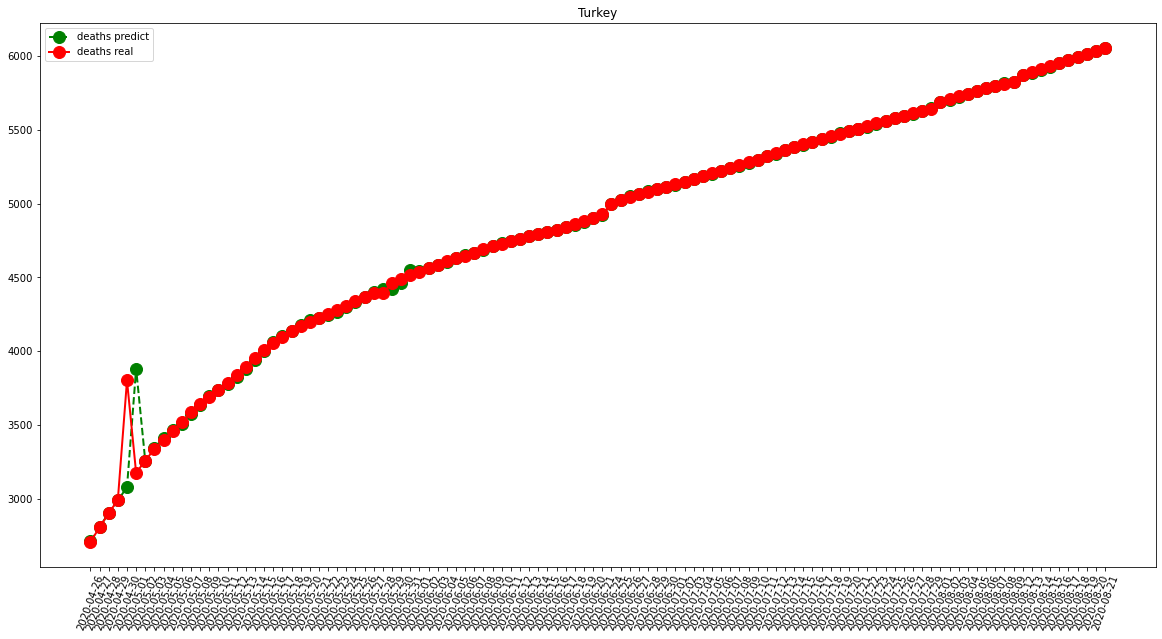

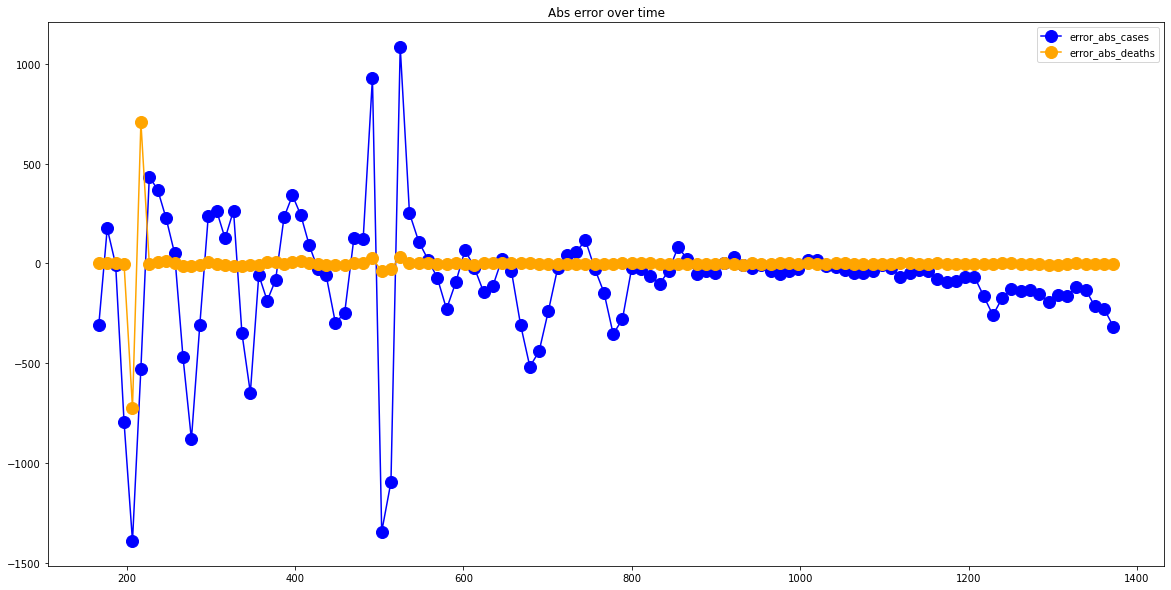

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12552.10465116279
RMSE =  16891.813009733854
-- Brazil performances for deaths --
MAE =  403.3255813953488
RMSE =  497.5447157653737


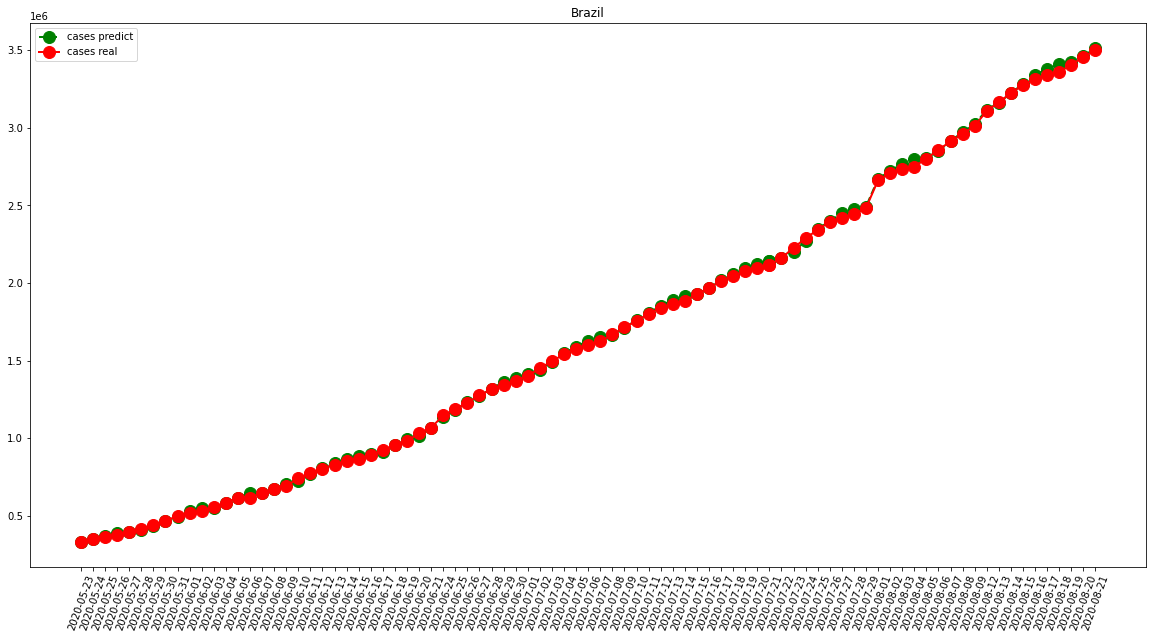

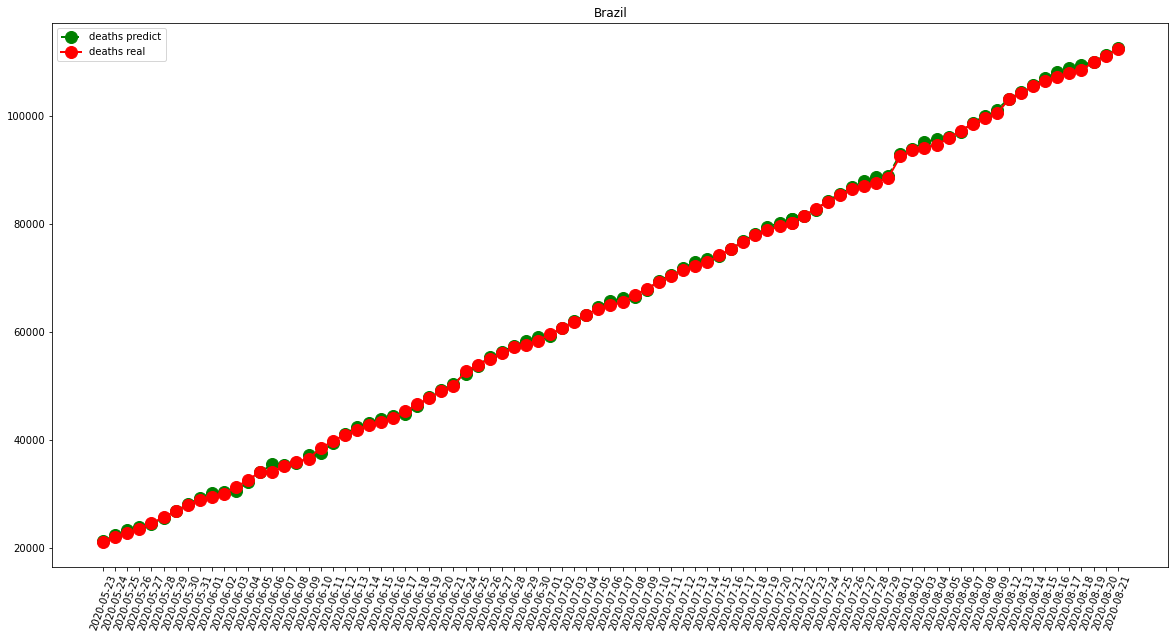

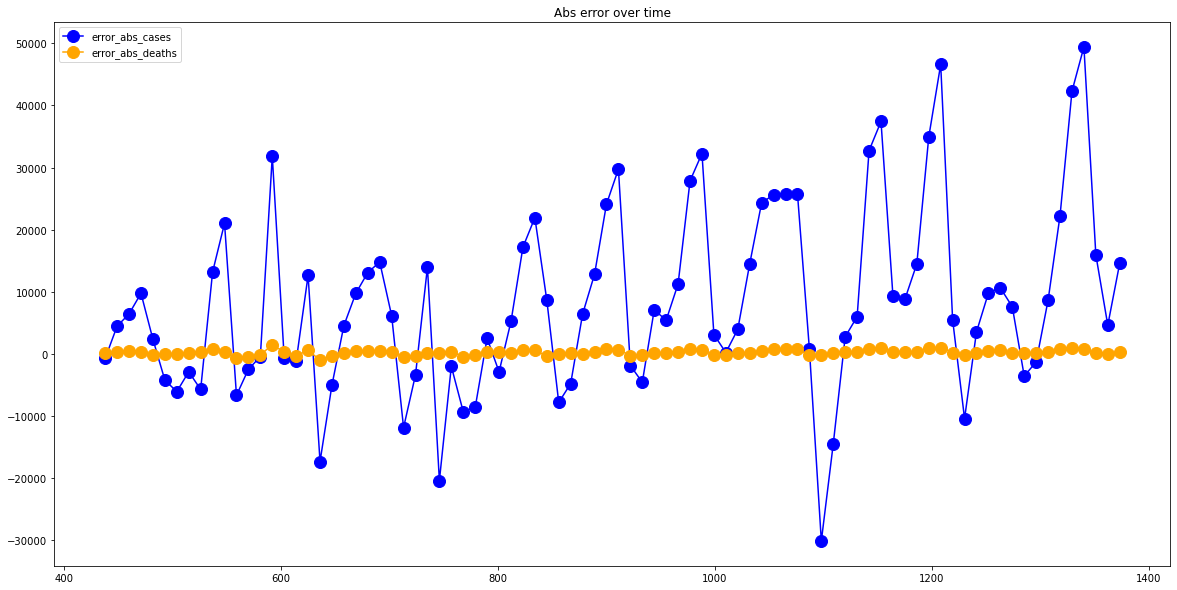

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)